In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mwviews.api import PageviewsClient

In [60]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [2]:
p = PageviewsClient(user_agent="<org@organization.org> Smartphone analysis")

In [3]:
xiaomi_page = p.article_views('hi.wikipedia', 'श्याओमी', granularity='daily', start='20181201', end='20190831')

In [4]:
huawei_page = p.article_views('hi.wikipedia', 'वाहवे', granularity='daily', start='20181201', end='20190831')

In [5]:
vivo_page = p.article_views('hi.wikipedia', 'वीवो मोबाइल', granularity='daily', start='20181201', end='20190831')

In [6]:
samsung_page = p.article_views('hi.wikipedia', 'सैमसंग', granularity='daily', start='20181201', end='20190831')

In [56]:
def format_data(page):
    page = pd.DataFrame(page)
    page = page.transpose()
    page.index = pd.to_datetime(page.index)
    page = page.resample('w').sum()
    return page

In [57]:
xiaomi_format = format_data(xiaomi_page)
huawei_format = format_data(huawei_page)
vivo_format = format_data(vivo_page)
samsung_format = format_data(samsung_page)

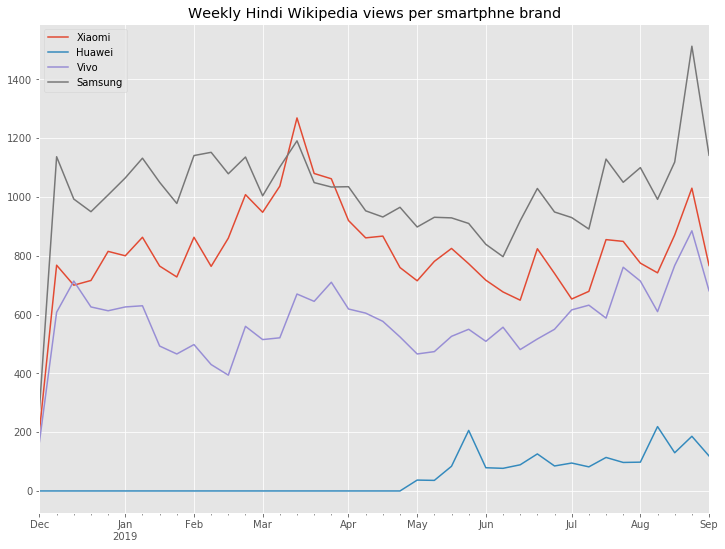

In [70]:
legend = ['Xiaomi' ,'Huawei', 'Vivo', 'Samsung']
ax = xiaomi_format.plot()
_ = huawei_format.plot(ax=ax)
_ = vivo_format.plot(ax=ax)
_ = samsung_format.plot(ax=ax)
_ = plt.legend(legend)
_ = plt.title('Weekly Hindi Wikipedia views per smartphne brand')